# Hypothesis Testing with Insurance Data (Core)

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


- For each question, make sure to:
    - State your Null Hypothesis and Alternative Hypothesis
    - Select the correct test according to the data type and number of samples
    - Test the assumptions of your selected test.
    - Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - Interpret your p-value and reject or fail to reject your null hypothesis
    - Show a supporting visualization that helps display the result

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

In [3]:
smoker_df = df.loc[df.smoker =='yes', ['smoker','charges']]
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [4]:
nonsmoker_df = df.loc[df.smoker =='no', ['smoker','charges']]
nonsmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


# State your Null Hypothesis and Alternative Hypothesis

- H0 Null Hypothesis
    - No significant difference in insurance costs exists between smokers and non-smokers.

- HA Alternate Hypothesis
    - There is a significant difference in insurance costs exists between smokers and non-smokers.

# Select the correct test according to the data type and number of samples

- Data Type:
    - Numeric
    
- Number of Samples:
    -  2 smoker and non smoker
    
- Test:
    - 2-Sample T-Test

# Test the assumptions of your selected test

In [5]:
smoker_group = smoker_df['charges']
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [6]:
nonsmoker_group = nonsmoker_df['charges']
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

- Need to remove the 24 outliers

In [7]:
len(nonsmoker_group)

1064

In [8]:
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
len(nonsmoker_group)

1040

# Test for Normality

In [9]:
result = stats.normaltest(nonsmoker_group)
result.pvalue

2.6945416315543976e-36

In [10]:
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

# Test for Equal Variances

In [11]:
result = stats.levene(smoker_group, nonsmoker_group)
print(result)
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
The groups do NOT have equal variance.


# Execute the selected test, or the alternative test

In [12]:
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

# Interpret your p-value and reject or fail to reject your null hypothesis

- The pvalue for the Welsh Test was <.05
- We reject the null hypothesis and support the alternative that there is a significant difference in insurance costs exists between smokers and non-smokers

# Supporting visualization that helps display the result

In [13]:
plot_df = pd.concat([smoker_df, nonsmoker_df])

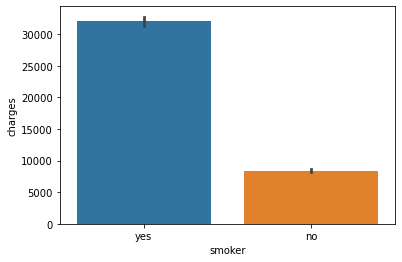

In [14]:
sns.barplot(data=plot_df, x='smoker', y='charges', ci=68)

# Q2. Are men more likely to smoke than women?

In [15]:
male_df = df.loc[df.sex =='male', ['sex','smoker']].copy()
male_df

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no
...,...,...
1324,male,no
1325,male,no
1327,male,no
1329,male,no


In [16]:
female_df = df.loc[df.sex =='female', ['sex','smoker']].copy()
female_df

,sex,smoker
0,female,yes
5,female,no
6,female,no
7,female,no
9,female,no
...,...,...
1332,female,no
1334,female,no
1335,female,no
1336,female,no


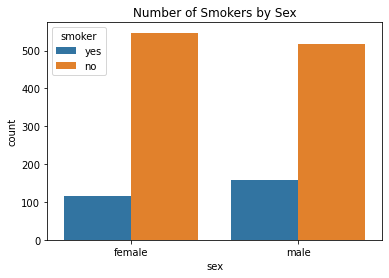

In [17]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

# State your Null Hypothesis and Alternative Hypothesis

- H0 Null Hypothesis
    - No significant difference in the likelihood of being a smoker exists between men and women.

- HA Alternate Hypothesis
    - There is a significant difference in the likelihood of being a smoker exists between men and women.

# Select the correct test according to the data type and number of samples

- Data Type:
    - Categorical
    
- Number of Samples:
    -  2
    
- Test:
    - Chi-Square

# Test the assumptions of your selected test

There are two categorical variables
- Men
- Women

The outcomes are independent

In [18]:
# calculate the contingency table with pd.cross-tab
data = pd.crosstab(df['sex'], df['smoker'])
data

smoker,no,yes
sex,,
female,547,115
male,517,159


In [19]:
result = stats.chi2_contingency(data)
chi2, p, deg_free, expected_vals = result
p

0.006548143503580696

In [20]:
p<.05

True

# Interpret your p-value and reject or fail to reject your null hypothesis

- Since p<.05 we reject the null hypothesis and conclude that there is a significant difference in the likelihood of being a smoker exists between men and women

In [21]:
pd.crosstab(df['sex'], df['smoker'], normalize = True)

smoker,no,yes
sex,,
female,0.408819,0.085949
male,0.386398,0.118834


8% of woman and 12% of men smoke. Because we rejected the null hypothesis we can see that men are more likely to smoke than women.

# Q3. Do different regions have different charges, on average?

In [22]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [23]:
## Create groups dictionary
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

# State your Null Hypothesis and Alternative Hypothesis

- H0 Null Hypothesis
    - No significant difference in charges exists between regions.

- HA Alternate Hypothesis
    - There is a significant difference in charges between regions.

# Select the correct test according to the data type and number of samples

- Data Type:
    - Numeric
    
- Number of Samples:
    -  more than 2 regions
    
- Test:
    - ANOVA or Tukey

# Test the assumptions of your selected test

In [24]:
for i, data in groups.items():

    outliers = np.abs(stats.zscore(data)) > 3
    print(f"There were {outliers.sum()} outliers in the {i} group.")

    data = data.loc[~outliers]
    groups[i] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


# Test for Normality

In [25]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


The data may not be normally distributed but the sample sizes are large enough that we can go to the Central Limit Theorem

# Test for Equal Variance

In [26]:
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

The samples do not have equal variance. So we need to do Kruskal-Wallis.

In [27]:
stats.kruskal(*groups.values())

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

The Kruskal test gave a better p value than .05. We do not have enough evidence to reject the null hypothesis. So there is no significant difference in charges among the different regions.

# Supporting visualization that helps display the result

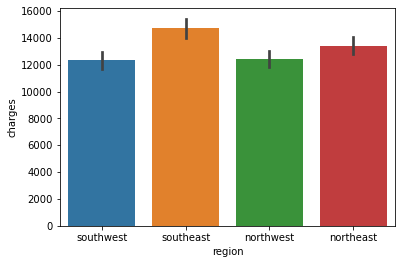

In [28]:
sns.barplot(data=df, x='region', y='charges', ci=68);